## Load SEED_V Data

In [5]:
%load_ext autoreload
%autoreload 2
# import packages
from cl_sster import cl_sster
import numpy as np
import os
import scipy.io as sio
from postprocessing_utils import calc_isc, calc_isc_train
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from postprocessing_utils import plot_dendrogram
import torch
import mne
fs = 125
# Load video data
datadir = r'D:\Data\Emotion\FACED\Processed_data_filter_epoch_0.50_40_manualRemove_ica'
datadir = '/mnt/repo3/zqz/Emotion_EEG_Dataset/SEED_SJTU/SEED-V/AutoICA_Processed/SEED_V/Processed_data_filter_0.50_47.00_AutoICA_Cus_Threshold/data'
datadir = './data/SEED_V/data'
datadir = './data/Faced/Processed_data_filter_epoch_0.50_40_manualRemove_ica'
print(datadir)
video_len = [81,63,73,78,69,90,56,60,105,45,60,81,35,44,38,43,55,69,73,129,77,75,34,37,67,63,54,77]
video_len = [72,96,237,187,147,258,297,69,264,141,174,172,234,240,155,\
             237,189,66,127,131,59,240,230,120,99,187,116,95,219,76,\
             291,65,165,90,52,239,84,72,228,285,220,118,207,131,178]
for i in range(len(video_len)):
    video_len[i] += 0.008
n_points = np.array(video_len) * fs
# n_points = n_points.astype(int)

n_vids = len(video_len)
data_paths = os.listdir(datadir)
data_paths.sort()
# n_subs = 123
# chn = 30
n_subs = 16
chn = 60
count = 0
data = np.zeros((n_subs, np.sum(n_points).astype(int), chn))
for idx, path in enumerate(data_paths):
    if 'all' in path:
        print(f'sub {count}/{n_subs}')
        data[count,:,:] = sio.loadmat(os.path.join(datadir, path))['merged_data_all_cleaned'].transpose()
        count += 1
print(data.shape)

# Normalization without outliers
print('Normalizing')
for sub in range(n_subs):
    thr = 30 * np.median(abs(data[sub]))
    data[sub] = (data[sub] - np.mean(data[sub][data[sub] < thr])) / np.std(data[sub][data[sub] < thr])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
./data/SEED_V/data
sub 0/16


sub 1/16
sub 2/16
sub 3/16
sub 4/16
sub 5/16
sub 6/16
sub 7/16
sub 8/16
sub 9/16
sub 10/16
sub 11/16
sub 12/16
sub 13/16
sub 14/16
sub 15/16
(16, 919920, 60)
Normalizing


### Load Faced Data

In [2]:
%load_ext autoreload
%autoreload 2
# import packages
from cl_sster import cl_sster
import numpy as np
import os
import scipy.io as sio
from postprocessing_utils import calc_isc, calc_isc_train
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from postprocessing_utils import plot_dendrogram
import torch
import mne
# parameters
fs = 125
epochs_pretrain = 50
timeLen = 5
# Load video data
# datadir = r'D:\Data\Emotion\FACED\Processed_data_filter_epoch_0.50_40_manualRemove_ica'
# datadir = '/mnt/repo3/zqz/Emotion_EEG_Dataset/SEED_SJTU/SEED-V/AutoICA_Processed/SEED_V/Processed_data_filter_0.50_47.00_AutoICA_Cus_Threshold/data'
# datadir = './data/SEED_V/data'
datadir = './data/Faced/Processed_data_filter_epoch_0.50_40_manualRemove_ica'
print(datadir)
video_len = [81,63,73,78,69,90,56,60,105,45,60,81,35,44,38,43,55,69,73,129,77,75,34,37,67,63,54,77]
n_points = np.array(video_len).astype(int) * fs

n_vids = len(video_len)
data_paths = os.listdir(datadir)
data_paths.sort()
n_subs = 123
chn = 30
count = 0
data = np.zeros((n_subs, np.sum(n_points), chn))
for idx, path in enumerate(data_paths):
    if path[:3] == 'sub':
        print(f'Reading Sub {count}/{n_subs}')
        data[count,:,:] = sio.loadmat(os.path.join(datadir, path))['data_all_cleaned'].transpose()
        count += 1
print(data.shape)
from tqdm import tqdm
# Normalization without outliers
print('Normalizing')
for sub in tqdm(range(n_subs)):
    thr = 30 * np.median(abs(data[sub]))
    data[sub] = (data[sub] - np.mean(data[sub][data[sub] < thr])) / np.std(data[sub][data[sub] < thr])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
./data/Faced/Processed_data_filter_epoch_0.50_40_manualRemove_ica
Reading Sub 0/123
Reading Sub 1/123
Reading Sub 2/123
Reading Sub 3/123
Reading Sub 4/123
Reading Sub 5/123
Reading Sub 6/123
Reading Sub 7/123
Reading Sub 8/123
Reading Sub 9/123
Reading Sub 10/123
Reading Sub 11/123
Reading Sub 12/123
Reading Sub 13/123
Reading Sub 14/123
Reading Sub 15/123
Reading Sub 16/123
Reading Sub 17/123
Reading Sub 18/123
Reading Sub 19/123
Reading Sub 20/123
Reading Sub 21/123
Reading Sub 22/123
Reading Sub 23/123
Reading Sub 24/123
Reading Sub 25/123
Reading Sub 26/123
Reading Sub 27/123
Reading Sub 28/123
Reading Sub 29/123
Reading Sub 30/123
Reading Sub 31/123
Reading Sub 32/123
Reading Sub 33/123
Reading Sub 34/123
Reading Sub 35/123
Reading Sub 36/123
Reading Sub 37/123
Reading Sub 38/123
Reading Sub 39/123
Reading Sub 40/123
Reading Sub 41/123
Reading Sub 42/123
Reading Sub 43/123
Reading Sub 44/123
R

100%|██████████| 123/123 [00:17<00:00,  7.11it/s]


## Load Custom Data

In [ ]:
%load_ext autoreload
%autoreload 2

# import packages
import pickle
from cl_sster import cl_sster
import numpy as np
import os
import scipy.io as sio
from postprocessing_utils import calc_isc, calc_isc_train
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from postprocessing_utils import plot_dendrogram
import torch

import mne

fs = 200
# Load video data
datadir = r'D:\Data\Emotion\FACED\Processed_data_filter_epoch_0.50_40_manualRemove_ica'
datadir = '/mnt/repo3/zqz/Emotion_EEG_Dataset/SEED_SJTU/SEED-V/AutoICA_Processed/SEED_V/Processed_data_filter_0.50_47.00_AutoICA_Cus_Threshold/data'
datadir = '/mnt/repo3/zqz/Emotion_EEG_Dataset/Custom/Clisa_data_vid'
print(datadir)
video_len = [72,96,237,187,147,258,297,69,264,141,174,172,234,240,155,\
             237,189,66,127,131,59,240,230,120,99,187,116,95,219,76,\
             291,65,165,90,52,239,84,72,228,285,220,118,207,131,178]
video_len = [30] * 21
# for i in range(len(video_len)):
#     video_len[i] += 0.008
n_points = np.array(video_len) * fs
# n_points = n_points.astype(int)

n_vids = len(video_len)
data_paths = os.listdir(datadir)
data_paths.sort()
# n_subs = 123
# chn = 30
n_subs = 20
chn = 64
count = 0
data_ = np.zeros((n_subs, np.sum(n_points).astype(int), chn))
print(data_.shape)
for sub_i, path in enumerate(data_paths):
    print(f'Reading Sub {sub_i+1}/{len(data_paths)}')
    if path.endswith('.pkl'):  # 检查文件是否以.pkl结尾
        filepath = os.path.join(datadir, path)
        # 打开.pkl文件以二进制读取模式打开
        with open(filepath, 'rb') as file:
            # 使用pickle.load()方法加载数据
            data_idx = pickle.load(file)
            data_idx = np.array(data_idx)
            data_idx = np.transpose(data_idx, (1, 2, 0))
            # print(data_idx.shape)
            point_st = 0
            point_ed = 0
            for vid_i in range(n_vids):
                point_ed = point_st + int(video_len[vid_i] * fs)
                data_[sub_i, point_st:point_ed, :] = data_idx[vid_i]
                point_st = point_ed

            
    # if 'all' in path:
    #     data[count,:,:] = sio.loadmat(os.path.join(datadir, path))['merged_data_all_cleaned'].transpose()
    #     count += 1
data = data_
print(data.shape)

# Normalization without outliers
print('Normalizing')
for sub in range(n_subs):
    thr = 30 * np.median(abs(data[sub]))
    data[sub] = (data[sub] - np.mean(data[sub][data[sub] < thr])) / np.std(data[sub][data[sub] < thr])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/mnt/repo3/zqz/Emotion_EEG_Dataset/Custom/Clisa_data_vid
(20, 126000, 64)
Reading Sub 1/20
Reading Sub 2/20
Reading Sub 3/20
Reading Sub 4/20
Reading Sub 5/20
Reading Sub 6/20
Reading Sub 7/20
Reading Sub 8/20
Reading Sub 9/20
Reading Sub 10/20
Reading Sub 11/20
Reading Sub 12/20
Reading Sub 13/20
Reading Sub 14/20
Reading Sub 15/20
Reading Sub 16/20
Reading Sub 17/20
Reading Sub 18/20
Reading Sub 19/20
Reading Sub 20/20
(20, 126000, 64)
Normalizing


# Training Pretrain_Encoder

In [3]:
# Train the cross-validation model

train_info = '_Faced_vid_'
epochs_pretrain = 50
timeLen = 5
%load_ext autoreload
%autoreload 2
from cl_sster import cl_sster
print('Initializing...')
gpu_index = 7
torch.cuda.set_device(gpu_index)
cl_model_ = cl_sster(n_folds=20, weight_decay=0.00015, epochs_pretrain=epochs_pretrain, timeLen=timeLen, fs=fs, data_type='video', model='attention', train_info = train_info, gpu_index=gpu_index)
cl_model = cl_model_
print('Loading Data')
cl_model.load_data(data, n_points) # fs: sampling rate
print('Data Loaded')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Initializing...
is cuda available: True
_Faced_vid_
The results will be saved to: results/video/_Faced_vid_nfold20_timeLen5_wd0.000150_epochs50_tfLen30_avgPool15_timeStep2.000_cv
Loading Data
Data Loaded


In [4]:
cl_model.train_cl_sster()

Conduct cross-validation
val sub [0 1 2 3 4 5]
train sub [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122]
data_train.shape, data_val.shape (26778375, 30) (28151625, 30)
ConvNet_attention_simple(
  (timeConv): Conv2d(1, 8, kernel_size=(1, 30), stride=(1, 1), padding=(0, 14))
  (spatialConv): Conv2d(8, 8, kernel_size=(30, 1), stride=(1, 1))
  (msConv1): Conv2d(8, 16, kernel_size=(30, 2), stride=(1, 1), groups=8)
  (msConv2): Conv2d(8, 16, kernel_size=(30, 2), stride=(1, 1), dilation=(1, 3), groups=8)
  (msConv3): Conv2d(8, 16, kernel_size=(30, 2), stride=(1

## Show train loss

./results/video/_Faced_vid_nfold20_timeLen5_wd0.000150_epochs50_tfLen30_avgPool15_timeStep2.000_cv/results.pkl


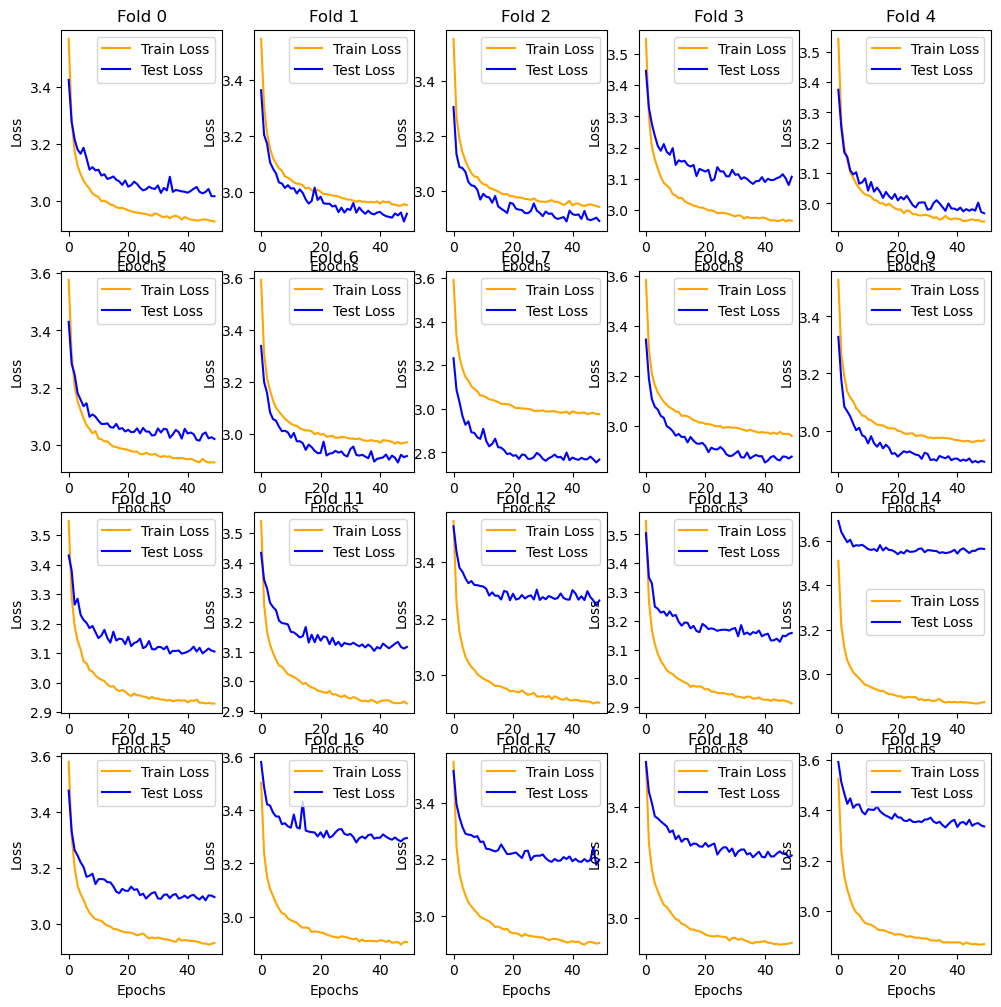

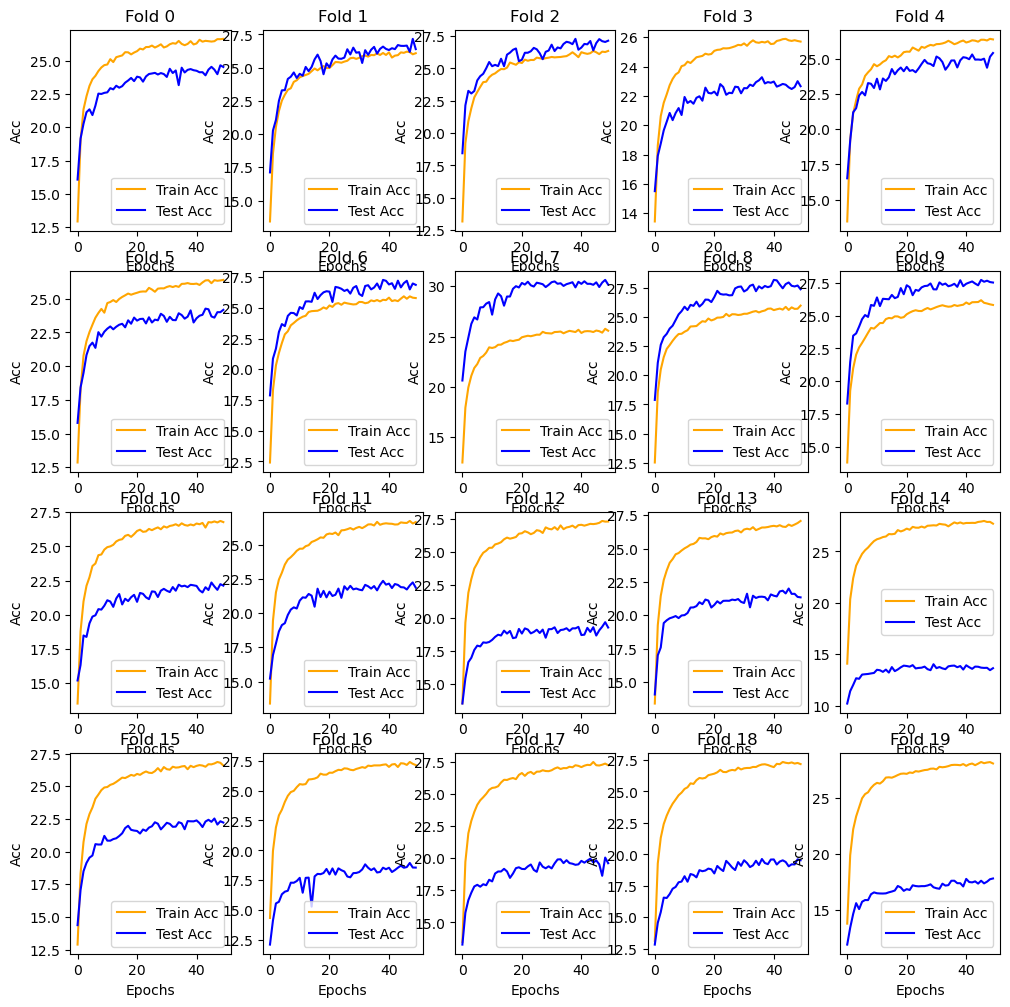

In [3]:
import pickle
import matplotlib.pyplot as plt
model_weight_dir = './results/video/_Faced_vid_nfold20_timeLen5_wd0.000150_epochs50_tfLen30_avgPool15_timeStep2.000_cv'
model_weight_dir = './results/video/_SEED_vid_nfold16_timeLen30_wd0.050000_epochs100_tfLen30_avgPool15_timeStep15.000_cv'
pretrain_loss_path = model_weight_dir + '/results.pkl'
print(pretrain_loss_path)

# 修改check_fold的范围为0-16
with open(pretrain_loss_path, 'rb') as file:
    pretrain_loss_history = pickle.load(file)

    # 创建4x4的小子图
    plt.figure(figsize=(12, 12))
    for check_fold in range(20):
        train_loss_history = pretrain_loss_history['train_loss_history'][check_fold]
        test_loss_history = pretrain_loss_history['val_loss_history'][check_fold]
        train_accuracies = pretrain_loss_history['train_top1_history'][check_fold]
        test_accuracies = pretrain_loss_history['val_top1_history'][check_fold]
        plt.subplot(4, 5, check_fold+1)

        # 绘制损失值图表
        plt.plot(train_loss_history, label='Train Loss', color='orange')
        plt.plot(test_loss_history, label='Test Loss', color='blue')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Fold {}'.format(check_fold))
        plt.legend()
    plt.show()

    plt.figure(figsize=(12, 12))
    for check_fold in range(20):
        train_loss_history = pretrain_loss_history['train_loss_history'][check_fold]
        test_loss_history = pretrain_loss_history['val_loss_history'][check_fold]
        train_accuracies = pretrain_loss_history['train_top1_history'][check_fold]
        test_accuracies = pretrain_loss_history['val_top1_history'][check_fold]
        plt.subplot(4, 5, check_fold+1)

        # 绘制损失值图表
        plt.plot(train_accuracies, label='Train Acc', color='orange')
        plt.plot(test_accuracies, label='Test Acc', color='blue')
        plt.xlabel('Epochs')
        plt.ylabel('Acc')
        plt.title('Fold {}'.format(check_fold))
        plt.legend()
    plt.show()


In [ ]:
print(out.shape)
print(n_points_cum)

NameError: name 'out' is not defined

In [ ]:
len(n_points_cum)

46

In [ ]:
sample = out[0]


(256, 61226)


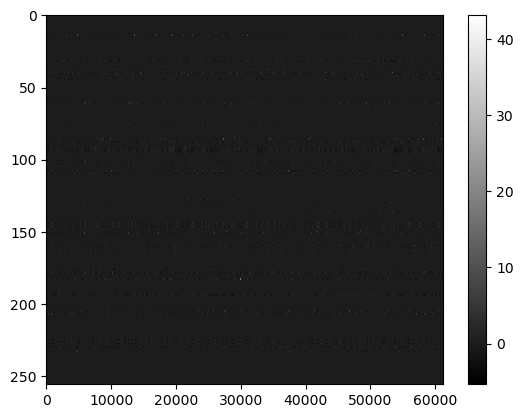

In [ ]:
import matplotlib.pyplot as plt
# 使用 matplotlib 的 imshow 函数将矩阵以灰度图形式显示出来
img_data = sample
print(img_data.shape)
vmin = img_data.min()  # 最小值
vmax = img_data.max()  # 最大值
plt.imshow(img_data, cmap='gray', interpolation='nearest', aspect='auto')

# 添加颜色条
plt.colorbar()

# 显示图形
plt.show()